# Project: WeRateDogs Wrangling and Analyze Data

## by Rebecca Appiok

### Introduction

This project is about wrangling of tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. 
There are 3 main dataset that is going to be used, and these are :
1. twitter_archive_enhanced.csv : it contains all the archive of the twitter about dog rating.
2. image_predictions.tsv : present in each tweet according to a neural network.
3. tweet_json : contains each tweet's retweet count and favorite ("like") count at the minimum and any additional data you find interesting.



Project Steps Overview
     1. Gathering data
     2. Assessing data
     3. Cleaning data
     4. Storing data
     5. Analyzing, and visualizing data
     6. Reporting 

## Data Gathering
At this phase, I am going to gatter or load all three datasets mentioned above so that we can begin the wrangling process. 

* Before loading the dataset, we would import all the necessary libraries that we are going to need


In [1]:
#  Importing all necessary libraries to be used in this project

import pandas as pd
import requests
import os
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### 1. twitter_archive_enhanced.csv
Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
# loading data for the twitter archive 

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv'

with open("twitter-archive-enhanced.csv", mode='wb') as file:
    data = requests.get(url)
    file.write(data.content)
    
twitter_ar = pd.read_csv("twitter-archive-enhanced.csv")

In [3]:
twitter_ar.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### 2. image_predictions.tsv
Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:

url1 = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

with open("image_predictions.tsv", mode='wb') as file:
    image = requests.get(url1)
    file.write(image.content)
    
image_pred = pd.read_csv("image_predictions.tsv", sep='\t')

In [5]:
image_pred.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### 3. tweet_json.txt

Was suppose to use the tweepy library to query the additional data via the Twitter API (tweet_json.txt) but was haing issues with the developers privilege, so used the one provided by Udacity. 


In [6]:

url2 = 'https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt'

with open("tweet_json.txt", mode='wb') as file:
    tweet = requests.get(url2)
    file.write(tweet.content)

In [7]:
tweet_list = []
with open('tweet_json.txt', 'r') as file:
    for line in file:
        data1 = json.loads(line)
        tweet_list.append(data1)
        
df = pd.DataFrame(tweet_list, columns = tweet_list[0].keys())
tweet_df = df[['id', 'retweet_count', 'favorite_count']]

In [8]:
tweet_df.head(4)

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908


## Assessing Data
In this section, I am going to use both visual assessment programmatic assessement to assess the data. This is to determine the quality and tidiness of the data.
 * In assessing the quality of the data you check see if the data is dirty, this has to do with issues with its content is often called low-quality data and can include things like inaccurate data, corrupted data, and duplicate data.
 * For the tidiness of the data we look out for issues with its structure. It is often referred to as untidy.


### 1. Visual Assessment

#####  a. Visually assessing twitter_ar

In [9]:
twitter_ar

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


##### b. Visually assessing image_pred

In [10]:
image_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


##### c. Visually assessing tweet_df

In [11]:
tweet_df

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


### 2. Programmatic Assessement

##### a. The twitter ar dataset

* Prgrammatically assessing the twitter_ar dataset using functions such as infor, describe, isnull, duplicate, dtypes, sample, etc

In [12]:
# looking at the over all summary of the data

twitter_ar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [13]:
# Check if there are any erroneous datatypes
twitter_ar.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [14]:
# checking the structure of the data

twitter_ar.shape

(2356, 17)

In [15]:
# checking for duplicates in the dataset

sum(twitter_ar.duplicated())

0

In [16]:
# further checking of duplicate by specific columns - tweet_id

twitter_ar.tweet_id.duplicated().sum()

0

In [17]:
# further checking of duplicate by specific columns - expanded_urls 

twitter_ar.expanded_urls.isnull().sum()

59

In [18]:
# Check the individual value counts for each value of source column
twitter_ar.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [19]:
# further checking of duplicate by specific columns - tweet_id

twitter_ar.source.duplicated().sum()

2352

In [20]:
twitter_ar.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [21]:
# Checking where rating_numerator is maximum
twitter_ar[twitter_ar.rating_numerator == twitter_ar.rating_numerator.max()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None


In [22]:
# Checking where rating_denominator is maximum
twitter_ar[twitter_ar.rating_denominator == twitter_ar.rating_denominator.max()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None


In [23]:
# Checking where rating_numerator is greater than 20
twitter_ar[twitter_ar.rating_numerator > 20]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None


In [24]:
# Checking sum for rating_numerator is greater than 20
twitter_ar.rating_numerator[twitter_ar.rating_numerator > 20].sum()

5978

In [25]:
# Checking where rating_denominator is not 10
twitter_ar[(twitter_ar.rating_denominator > 10)|(twitter_ar.rating_denominator < 10) ]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [26]:
# Checking the sum of rating_denominator is not 10
(twitter_ar.rating_denominator > 10).sum()+(twitter_ar.rating_denominator < 10).sum()

23

##### b. The image_pred dataset

* Prgrammatically assessing the image_pred dataset using functions such as infor, describe, isnull, duplicate, dtypes, sample, etc

In [27]:
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [28]:
image_pred.describe()


,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [29]:
image_pred.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [30]:
# Check if there are any duplicated tweet ids
image_pred.tweet_id.duplicated().sum()

0

In [31]:
# Check if there are any duplicated jpg_url

image_pred.jpg_url.duplicated().sum()

66

In [32]:
# looking at the various duplication in the jpg_url column

image_pred[image_pred.jpg_url.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
1364,761371037149827077,https://pbs.twimg.com/tweet_video_thumb/CeBym7...,1,brown_bear,0.713293,False,Indian_elephant,0.172844,False,water_buffalo,0.038902,False
1368,761750502866649088,https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg,1,golden_retriever,0.586937,True,Labrador_retriever,0.398260,True,kuvasz,0.005410,True
1387,766078092750233600,https://pbs.twimg.com/media/ChK1tdBWwAQ1flD.jpg,1,toy_poodle,0.420463,True,miniature_poodle,0.132640,True,Chesapeake_Bay_retriever,0.121523,True
1407,770093767776997377,https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg,1,golden_retriever,0.843799,True,Labrador_retriever,0.052956,True,kelpie,0.035711,True
1417,771171053431250945,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,3,Samoyed,0.978833,True,Pomeranian,0.012763,True,Eskimo_dog,0.001853,True


In [33]:
# verifying is assumptions of duplication is true

image_pred[image_pred.jpg_url == 'https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg' ] 

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
591,679158373988876288,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.25153,True,bath_towel,0.116806,False
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.25153,True,bath_towel,0.116806,False


There are image duplicate predictions present for duplicate jpg_url with different tweet_id; however, the rest of all the data are the same.

##### c. The tweet_df dataset
* Prgrammatically assessing the tweet_df dataset using functions such as infor, describe, isnull, duplicate, dtypes, sample, etc

In [34]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [35]:
tweet_df.describe()

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


### Quality issues
1. Null values recorded as None instead of NaN

2. Some columns in the twitter_ar dataset holds no data or very little amount of data

3. expanded_urls in the twitter_ar dataset has missing values

4. Same data type of the twitter_ar dataset columns are not right

5. Invalid dog names in the twitter_ar

6. Columns p1, p2 and p3 in the image_pred dataset have values as upper case sometimes lowercase other times

7. tweet id title in the tweet_df dataset has a different naming to the id column name for other datasets.

8. In the image_pred dataset there are image duplicate predictions 

9. In the image_pred dataset, the column names are not clearly descriptive

10. In the twitter_ar dataset, rating_denominator is other than assumed standard value of 10 at some places which can be Inaccurate data
11. In the twitter_ar dataset, rating_numerator column has some exceptionally high values which leads to exceptionally high rating which can be inaccurate

### Tidiness issues
1. Redundent columns of same category (doggo, floofer, pupper, puppo), must be made one column

2. Merge all three dataset image_pred, twitter_ar and tweet_df 

## Cleaning Data
In this section, the focus is to clean all the issues detected in the data assessment level. 

The process includes 
1. Define - define how you will clean the issue in words
2. Code - convert your definitions into executable code
3. Test - test your data to ensure your code was implemented correctly


In [36]:
# Making copies of original pieces of data
twitter_clean = twitter_ar.copy()
img_clean = image_pred.copy()
tweet_clean = tweet_df.copy()

### 1. Fixing quality issues

In assessing the quality of the data you check see if the data is dirty, this has to do with issues with its content is often called low-quality data and can include things like inaccurate data, corrupted data, and duplicate data.

#### 1. Null values recorded as None 

 * Define: Check and replace all 'none' records in the twitter_clean dataset, particularly for doggo, floofer, pupper, and puppo columns

 * Code :

In [37]:
cols = ["doggo", "floofer", "pupper", "puppo"]

twitter_clean[cols]= twitter_clean[cols].replace('None', np.nan)

* Test :

In [38]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         97 non-null object
floofer                       10 non-null object
pupper                        257 non-null object
puppo                         30 non-null object
dtypes: float64(4), int64(3), object(10

Looking at the number of non-null values for "doggo", "floofer", "pupper", "puppo" columns, you could tell their is a lot of missing data because they were broken into different columns instand of one categorical column (dog_stage)

* this was the of non-null values before "none" was replaced with nan

     doggo               -          2356 non-null 
     
     floofer             -          2356 non-null 
     
     pupper              -          2356 non-null 
     
     puppo               -          2356 non-null 

#### 2. Removing columns with lot of missing values
 
In the twitter_clean dataset, there are many columns with missing values and these include: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp
 
 
 * Define: check and drop the unnecessary columns in_reply_to_status_id, in_reply_to_user_id, retweeted_status_timestamp and retweeted_status_user_id

* Code:

In [39]:
twitter_clean = twitter_clean.drop(['in_reply_to_status_id',
                                    'in_reply_to_user_id', 
                                    'retweeted_status_user_id', 
                                    'retweeted_status_timestamp'], axis=1)

* Test:

In [40]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id               2356 non-null int64
timestamp              2356 non-null object
source                 2356 non-null object
text                   2356 non-null object
retweeted_status_id    181 non-null float64
expanded_urls          2297 non-null object
rating_numerator       2356 non-null int64
rating_denominator     2356 non-null int64
name                   2356 non-null object
doggo                  97 non-null object
floofer                10 non-null object
pupper                 257 non-null object
puppo                  30 non-null object
dtypes: float64(1), int64(3), object(9)
memory usage: 239.4+ KB


Now the dataset has been reduce to make analysis easy

#### 3. Filling columns with missing values

expanded_urls in the twitter_clean dataset has 59 missing values but could be filled by adding the tweet_id to the url 'https://twitter.com/dog_rates/status/' as the status.

 * Define: Check and fill the missing values of expanded_urls column in tweet_data_clean table using tweet_id as tweet id is the last part of the tweet URL after "status/"

* Code:

In [41]:
twitter_clean.expanded_urls = 'https://twitter.com/dog_rates/status/' + twitter_clean.tweet_id.astype(str) 

In [42]:
twitter_clean.expanded_urls.isnull().sum()

0

#### 4. Data types issues 

Some of the columns in the twitter_clean dataset have the wrong data type, and these include; timestamp - should be datetime

 * Define: Change the datatype of timestamp to datetime 

In [43]:
twitter_clean.timestamp = pd.to_datetime(twitter_clean.timestamp)


* Test:

In [44]:
twitter_clean.dtypes

tweet_id                        int64
timestamp              datetime64[ns]
source                         object
text                           object
retweeted_status_id           float64
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

#### 5. Invalid values 

Dogs without names in the twitter_clean dataset were given names of "a", "such","quite", "the" or "an" 

 * Define: Check and replace all the names of dogs having invalid data with NaN

* Code:

In [45]:
# first checking for all the invalid names in the dataset

twitter_clean[twitter_clean .name.str.islower() == True].name.value_counts()

a               55
the              8
an               7
very             5
just             4
one              4
quite            4
getting          2
not              2
mad              2
actually         2
officially       1
life             1
by               1
light            1
all              1
such             1
my               1
infuriating      1
his              1
old              1
this             1
unacceptable     1
space            1
incredibly       1
Name: name, dtype: int64

In [46]:
# checking if there are any null values
sum(twitter_clean.name == 'None')

745

In [47]:
# replacing all invalid names with nan
for dog_name in twitter_clean.name:
    if dog_name.islower() == True:
        twitter_clean.name = twitter_clean.name.replace(dog_name, 'None')

* Test:

In [48]:
twitter_clean[twitter_clean .name.str.islower() == True].name.value_counts()

Series([], Name: name, dtype: int64)

In [49]:
sum(twitter_clean.name == 'None')

854

After all the invalid names have been replaced with 'None', now there is a sum of 845 none values for the name column instead of 745

#### 6. Uniformity of values
Columns p1, p2 and p3 in the image_pred dataset have values as upper case sometimes lowercase other times

 * Define: Check and replace the instance of _ with space and change the values to upper case in p1, p2 and p3`

* Code:

In [50]:
img_clean.p1 = img_clean.p1.str.replace('_', ' ').str.capitalize()
img_clean.p2 = img_clean.p2.str.replace('_', ' ').str.capitalize()
img_clean.p3 = img_clean.p3.str.replace('_', ' ').str.capitalize()

* Test:

In [51]:
img_clean.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
867,697575480820686848,https://pbs.twimg.com/media/Ca5JMvMUsAAGMll.jpg,1,Siamese cat,0.256698,False,Whippet,0.119805,True,Bull mastiff,0.102595,True
167,668986018524233728,https://pbs.twimg.com/media/CUi3PIrWoAAPvPT.jpg,1,Doormat,0.976103,False,Chihuahua,0.005640,True,Norfolk terrier,0.003913,True
522,676582956622721024,https://pbs.twimg.com/media/CWO0m8tUwAAB901.jpg,1,Seat belt,0.790028,False,Boston bull,0.196307,True,French bulldog,0.012429,True
1776,828376505180889089,https://pbs.twimg.com/media/C378BwxWMAA6CNK.jpg,1,American staffordshire terrier,0.523086,True,Staffordshire bullterrier,0.186168,True,Chihuahua,0.042089,True
1289,751251247299190784,https://pbs.twimg.com/ext_tw_video_thumb/75125...,1,Walker hound,0.178852,True,German short-haired pointer,0.115752,True,English foxhound,0.113796,True
81,667470559035432960,https://pbs.twimg.com/media/CUNU78YWEAECmpB.jpg,1,Toy poodle,0.304175,True,Pug,0.223427,True,Lakeland terrier,0.073316,True
1100,720775346191278080,https://pbs.twimg.com/media/CgC1WqMW4AI1_N0.jpg,1,Newfoundland,0.489970,True,Groenendael,0.174497,True,Giant schnauzer,0.079067,True
140,668544745690562560,https://pbs.twimg.com/media/CUcl5jeWsAA6ufS.jpg,1,Bearskin,0.427870,False,Bow,0.258858,False,Panpipe,0.021563,False
391,673576835670777856,https://pbs.twimg.com/media/CVkGjsxU8AA5OYX.jpg,1,Teddy,0.255210,False,Christmas stocking,0.098285,False,Pajama,0.072735,False
254,670733412878163972,https://pbs.twimg.com/media/CU7seitWwAArlVy.jpg,1,Dhole,0.350416,False,Hare,0.236661,False,Wood rabbit,0.091133,False


#### 7. Difference in column names 
Because the 3 dataset would be joined later, they must have a column unique value to join on, which is tweet_id. Howerver, in the tweet_clean dataset, the column name is different - id.

 * Define: Check and rename the id column to tweet_id for tweet_clean

* Code:

In [52]:
tweet_clean = tweet_clean.rename(columns = {'id': 'tweet_id'})

* Test

In [53]:
tweet_clean.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


#### 8. Image duplicate predictions 
The img_clean dataset has image duplicate predictions present for duplicate jpg_url with different tweet_id; however, the rest of all the data are the same.

 * Define: Check and drop rows where image_url is duplicated

* Code:

In [54]:
img_clean = img_clean.drop_duplicates(['jpg_url'])

* Test:

In [55]:
img_clean.jpg_url.duplicated().sum()

0

#### 9. Poor column names

For the img_clean dataset, some of the colums do not have good naming which make is difficult to understand
 
 * Define: rename the columns with descriptive names

* Code:

In [56]:
img_clean = img_clean.rename(columns = {'jpg_url':'image_url',
                                        'img_num':'image_number', 
                                        'p1':'first_prediction', 
                                        'p2':'second_prediction', 
                                        'p3':'third_prediction', 
                                        'p1_conf':'first_prediction_confidence', 
                                        'p2_conf':'second_prediction_confidence', 
                                        'p3_conf':'third_prediction_confidence', 
                                        'p1_dog':'first_prediction_dog', 
                                        'p2_dog':'second_prediction_dog', 
                                        'p3_dog':'third_prediction_dog'})


* Test:

In [57]:
img_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id                        2009 non-null int64
image_url                       2009 non-null object
image_number                    2009 non-null int64
first_prediction                2009 non-null object
first_prediction_confidence     2009 non-null float64
first_prediction_dog            2009 non-null bool
second_prediction               2009 non-null object
second_prediction_confidence    2009 non-null float64
second_prediction_dog           2009 non-null bool
third_prediction                2009 non-null object
third_prediction_confidence     2009 non-null float64
third_prediction_dog            2009 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 162.8+ KB


#### 10. rating_denominator and rating_numerator inaccurate data
In the twitter_ar dataset, rating_denominator is assumed standard value of 10 at some places which can be Inaccurate data and there are 6 instances of incorrectly entered rating_numerator values

 * Define: Identify all inaccurate rating_denominator and replace with the correct data, then drop the rating_numerator incorrect instances

 * Code:

In [58]:
# Checking instances where rating_denominator is not 10
pd.set_option('display.max_colwidth', 200)
twitter_clean[['text', 'rating_numerator', 'rating_denominator']].query('rating_denominator != 10')

,text,rating_numerator,rating_denominator
313,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
342,@docmisterio account started on 11/15/15,11,15
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
784,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",9,11
902,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1068,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1120,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1165,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1202,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50


In [59]:
# Checking for incorrect numerator values
pd.set_option('display.max_colwidth', 200)
twitter_clean[twitter_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator', 'rating_denominator']]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until


,text,rating_numerator,rating_denominator
45,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
340,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
1689,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5,10
1712,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10


You could see that in selecting the numerator values, ratings that had the numerator in decimals where done wrongly because the numbers pick was that after the decimal point.

In [60]:
# Replacing the incorrect ratings with correct ratings

twitter_clean.loc[45, 'rating_numerator':'rating_denominator'] = [13.50, 10]

twitter_clean.loc[340, 'rating_numerator':'rating_denominator'] = [9.75, 10]

twitter_clean.loc[763, 'rating_numerator':'rating_denominator'] = [11.27, 10]

twitter_clean.loc[784, 'rating_numerator':'rating_denominator'] = [14, 10]

twitter_clean.loc[1068, 'rating_numerator':'rating_denominator'] = [14, 10]

twitter_clean.loc[1165, 'rating_numerator':'rating_denominator'] = [13, 10]

twitter_clean.loc[1202, 'rating_numerator':'rating_denominator'] = [11, 10]

twitter_clean.loc[1598, 'rating_numerator':'rating_denominator'] = [13, 10]

twitter_clean.loc[1662, 'rating_numerator':'rating_denominator'] = [10, 10]

twitter_clean.loc[1689, 'rating_numerator':'rating_denominator'] = [9.50, 10]

twitter_clean.loc[1712, 'rating_numerator':'rating_denominator'] = [11.26, 10]

twitter_clean.loc[2335, 'rating_numerator':'rating_denominator'] = [9, 10]


In [61]:
# Droping records/instances that could be corrected

twitter_clean = twitter_clean.drop([342, 516, 784, 1598, 1662], axis = 0)

In [62]:
twitter_clean.dtypes

tweet_id                        int64
timestamp              datetime64[ns]
source                         object
text                           object
retweeted_status_id           float64
expanded_urls                  object
rating_numerator              float64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

### Issue 2: Fixing tidiness issues

For the tidiness of the data we look out for issues with its structure. It is often referred to as untidy.

####  1. Redundent columns
The twitter_clean dataset has redundent columns of same category (doggo, floofer, pupper, puppo), must be made one column

* Define : make the doggo, floofer, pupper, puppo columns one column that is **dog_status** and after drop the doggo, floofer, pupper, puppo columns.

* Code:

In [63]:
# Replacing the NaNs with empty string
twitter_clean[['doggo', 'floofer', 'pupper', 'puppo']] = twitter_clean[['doggo', 'floofer', 'pupper', 'puppo']].replace(np.nan, ' ')

In [64]:
# Combining the columns into one column
twitter_clean['dog_stage'] = twitter_clean['doggo'] + twitter_clean['floofer'] + twitter_clean['pupper'] + twitter_clean['puppo']

In [65]:
# Dropping the redundant columns
twitter_clean = twitter_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

* Test

In [66]:
twitter_clean.dog_stage.value_counts()

                  1971
  pupper           245
doggo               83
   puppo            29
doggo pupper        12
 floofer             9
doggofloofer         1
doggo  puppo         1
Name: dog_stage, dtype: int64

* doggopupper, doggofloofer and doggopuppo are multi_breed and could be categorized as one 

#### Quality issues
Grouping values of the same category for the name column in twitter_clean

* Define: replace the doggo pupper, doggofloofer and doggo puppo with multiple

In [67]:
twitter_clean.dog_stage = twitter_clean.dog_stage.replace('doggo pupper ', 'multiple')
twitter_clean.dog_stage = twitter_clean.dog_stage.replace('doggofloofer  ', 'multiple')
twitter_clean.dog_stage = twitter_clean.dog_stage.replace('doggo  puppo', 'multiple')

In [68]:
twitter_clean.dog_stage.value_counts()

              1971
  pupper       245
doggo           83
   puppo        29
multiple        14
 floofer         9
Name: dog_stage, dtype: int64

 **Looking at the value count for the vaious stage of dags there is 1976 number of tweet with no dog stage input.**

* Define : Check the text for the various dog stage then reform the dog_stage using these words

In [69]:
# First check the test column for the various type of dog stage names that appeared in the text. 

pd.set_option('display.max_colwidth', 200)
twitter_clean[['text', 'dog_stage']].sample(50)

,text,dog_stage
1627,"""FOR THE LAST TIME I DON'T WANNA PLAY TWISTER ALL THE SPOTS ARE GREY DAMN IT CINDY"" ...10/10 https://t.co/uhQNehTpIu",
1716,I hope everyone enjoys this picture as much as I do. This is Toby. 12/10 https://t.co/vHnu1g9EJm,
1612,This is Rocky. He sleeps like a psychopath. 10/10 quality tongue slip https://t.co/MbgG95mUdu,
1907,This pupper just wants a belly rub. This pupper has nothing to do w the tree being sideways now. 10/10 good pupper https://t.co/AyJ7Ohk71f,pupper
1622,"""Hello yes I'll just get one of each color thanks"" 12/10 for all https://t.co/AMDsllQs7a",
1319,Please enjoy this pup in a cooler. Permanently ready for someone to throw a tennis ball his way. 12/10 https://t.co/KUS0xl7XIp,
1297,This is Sadie. She's a Bohemian Rhapsody. Remarkably portable. Could sneak on roller coasters with (probably). 11/10 https://t.co/DB8fyeDs8B,
1861,Rare shielded battle dog here. Very happy about abundance of lettuce. Painfully slow fetcher. Still petable. 5/10 https://t.co/C3tlKVq7eO,
2345,This is the happiest dog you will ever see. Very committed owner. Nice couch. 10/10 https://t.co/RhUEAloehK,
2260,RT @dogratingrating: Unoriginal idea. Blatant plagiarism. Curious grammar. -5/10 https://t.co/r7XzeQZWzb,


In [70]:
# collection of names that appeared in the text 

dog_pupper = ['Pup', 'pup', 'pups', 'puppers', 'pupper', 'Pupper', 'puppeters', 'puppy', 'Puppy', 'Pup.', 'pup.', 'pups.', 'puppers.', 'pupper.', 'Pupper.', 'puppeters.', 'puppy.', 'Puppy.', 'pupper,', 'pupper?', '(pupper)', 'PUPPER', '(pupper).']
dog_doggo = ['Doggo', 'doggo', 'dogg', 'Doggo.', 'doggo.', 'dogg.', 'doggo?', '(doggo)', 'DOGGO', '(doggo),']
dog_puppo = ['puppo', 'Puppo', 'puppo.', 'Puppo.', 'puppo?']
dog_floofer = ['Floofer', 'floofs', 'floofer', 'floofers', 'floof', 'Floofy', 'floofy', 'floofs.', 'floofer.', 'floofers.', 'floof.', 'Floofy.', 'floofy.', 'Floofer.']


In [71]:
# creating a new column
twitter_clean['dog_stage1'] = ''
twitter_clean.head(2)

,tweet_id,timestamp,source,text,retweeted_status_id,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,dog_stage1
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,https://twitter.com/dog_rates/status/892420643555336193,13.0,10,Phineas,,
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,https://twitter.com/dog_rates/status/892177421306343426,13.0,10,Tilly,,


In [72]:
for i in twitter_clean.text:
    y = twitter_clean[twitter_clean.text == i].index.values
    x = str(i).strip(".,").split(' ')
    for word in x:
        if (word in dog_pupper) and (word in dog_doggo):
            twitter_clean.loc[y, 'dog_stage1'] = 'pupper & doggo'
        elif (word in dog_puppo) and (word in dog_doggo):
            twitter_clean.loc[y, 'dog_stage1'] = 'puppo & doggo'
        elif (word in dog_floofer) and (word in dog_doggo):
            twitter_clean.loc[y, 'dog_stage1'] = 'floofer & doggo'
        elif word in dog_pupper:
            twitter_clean.loc[y, 'dog_stage1'] = 'pupper'
        elif word in dog_doggo:
            twitter_clean.loc[y, 'dog_stage1'] = 'doggo'
        elif word in dog_puppo:
            twitter_clean.loc[y, 'dog_stage1'] = 'puppo'
        elif word in dog_floofer:
            twitter_clean.loc[y, 'dog_stage1'] = 'floofer'

In [73]:
# Replace the dog_stage column with the new column values
twitter_clean.dog_stage = twitter_clean.dog_stage1

In [74]:
# Drop the new column and replace instances of empty string with NaN
twitter_clean.dog_stage = twitter_clean.dog_stage.replace('', np.nan)
twitter_clean.drop('dog_stage1', axis=1, inplace=True)

In [75]:
twitter_clean.dog_stage.value_counts()

pupper     434
doggo       83
puppo       28
floofer     21
Name: dog_stage, dtype: int64

####  2. Merge of twitter_ar and tweet_df dataset

To make an easy analysis of the data we need to marge all three dataset that is img_clean, twitter_clean and tweet_clean dataset 

* Define : Merge the twitter_clean and tweet_clean dataset on tweet_id column

* Code:

In [76]:
tweet_clean_df = pd.merge(twitter_clean,tweet_clean, on = 'tweet_id', how = 'inner')

In [77]:
tweet_clean_data = pd.merge(tweet_clean_df,img_clean, on = 'tweet_id', how = 'inner')

* Test:

In [78]:
tweet_clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2006 entries, 0 to 2005
Data columns (total 23 columns):
tweet_id                        2006 non-null int64
timestamp                       2006 non-null datetime64[ns]
source                          2006 non-null object
text                            2006 non-null object
retweeted_status_id             14 non-null float64
expanded_urls                   2006 non-null object
rating_numerator                2006 non-null float64
rating_denominator              2006 non-null int64
name                            2006 non-null object
dog_stage                       481 non-null object
retweet_count                   2006 non-null int64
favorite_count                  2006 non-null int64
image_url                       2006 non-null object
image_number                    2006 non-null int64
first_prediction                2006 non-null object
first_prediction_confidence     2006 non-null float64
first_prediction_dog            2006 non-n

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [79]:
tweet_clean_data.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data

In this section, I would analyze and visualize the wrangled data. The questions we would like to get insight of include the following:
1. How often or active was the weratedog page 
2. How popular are the various dog stage
3. Are the ratings by WeRateDogs relative to the retweet count and favorite count?
4. correlation between ratings by WeRateDogs relative to the retweet count and favorite count?

#####  1.How often or active was the weratedog page 

* Extract the data that would be used to answer this question and find the year of tweet from the timestamp visualize based on a pie chart

In [80]:
tweet_data = tweet_clean_data[['tweet_id',
                               'timestamp','text' ,
                               'dog_stage',
                               'retweet_count',
                               'favorite_count']]

tweet_data['year'] = tweet_data['timestamp'].dt.year

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [81]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2006 entries, 0 to 2005
Data columns (total 7 columns):
tweet_id          2006 non-null int64
timestamp         2006 non-null datetime64[ns]
text              2006 non-null object
dog_stage         481 non-null object
retweet_count     2006 non-null int64
favorite_count    2006 non-null int64
year              2006 non-null int64
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 125.4+ KB


In [82]:
# finding the number of tweet for each year

count_year = tweet_data['year'].value_counts() 
count_year

2016    975
2015    665
2017    366
Name: year, dtype: int64

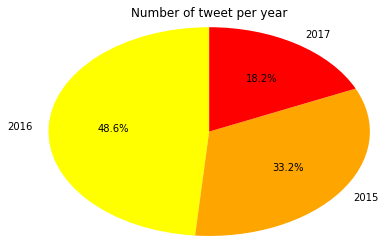

In [83]:
# graphing the number of tweet for each year their pecentages

label = ['2016', '2015','2017']
color = ['yellow', 'orange','red']

plt.pie(count_year, labels=label, colors=color, startangle=90, autopct='%1.1f%%',radius=1.2)
plt.title('Number of tweet per year')
plt.show()

From the count of the number of tweet per year, we could tell there were a lot of active tweet in the year 2016.

##### 2. How popular are the various dog stage

Use extracted data to answer this question and find the umber of tweet per dog stage and visualize based on a bar graph

In [84]:
count_dog = tweet_data['dog_stage'].value_counts() 
count_dog

pupper     380
doggo       62
puppo       21
floofer     18
Name: dog_stage, dtype: int64

Text(0.5,0,'dog stage')

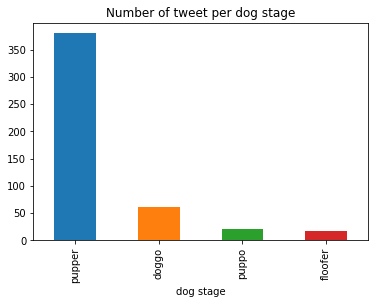

In [85]:
count_dog.plot( kind='bar', 
                  title = 'Number of tweet per dog stage')
                   
plt.xlabel('dog stage')


The number of count per dog stage shows that there is a higher number of pupper, followed by doggo, then puppo and floofer.

##### 3. Are the ratings by WeRateDogs relative to the retweet count and favorite count?

Extract the data that would be used to answer this question of the relation between rating_numerator, and retweet_count and favorite count, then visualize based on a scatter plot

In [87]:
tweet_data1 = tweet_clean_data[['tweet_id', 
                               'rating_numerator', 
                               'rating_denominator', 
                               'dog_stage', 
                               'retweet_count', 
                               'favorite_count']]

In [88]:
tweet_data1.describe()

,tweet_id,rating_numerator,rating_denominator,retweet_count,favorite_count
count,2.006000e+03,2006.000000,2006.000000,2006.000000,2006.000000
mean,7.363067e+17,12.255249,10.508475,2743.180957,8826.476072
std,6.773195e+16,41.360363,7.239451,4657.523845,12192.731033
min,6.660209e+17,0.000000,10.000000,16.000000,0.000000
25%,6.758575e+17,10.000000,10.000000,618.000000,1896.000000
50%,7.088401e+17,11.000000,10.000000,1341.000000,4066.000000
75%,7.886775e+17,12.000000,10.000000,3179.250000,11247.750000
max,8.924206e+17,1776.000000,170.000000,79515.000000,132810.000000


In [89]:
tweet_data1.drop(index=list(tweet_data1.query('rating_numerator>=20').index),inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Text(0.5,1,'Relation between rating_numerator and retweet_count')

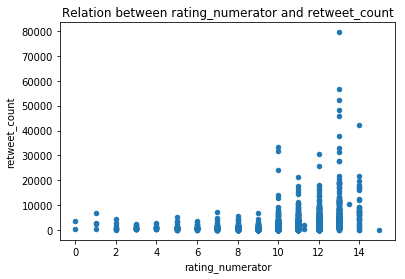

In [90]:
tweet_data1.plot(x='rating_numerator',y='retweet_count',kind='scatter');
plt.title('Relation between rating_numerator and retweet_count')

Text(0.5,1,'Relation between rating_numerator and favorite_count')

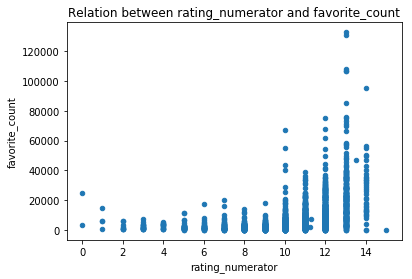

In [91]:
tweet_data1.plot(x='rating_numerator',y='favorite_count',kind='scatter');
plt.title('Relation between rating_numerator and favorite_count')

* Both graphs shows that rating_numerator and retweet_count, and rating_numerator and favorite_count are relative
* Also the rating_numerator 13 got the highest favorite counts and retweet counts.

##### 4. What is the correlation between ratings by WeRateDogs relative to the retweet count and favorite count?

Use the extract the data that would be used to answer this question of the correlation between rating_numerator, and retweet_count and favorite count, then visualize based on a scatter plot and calculating the correlation 

Text(0.5,1,'Correlation between rating_numerator and retweet_count')

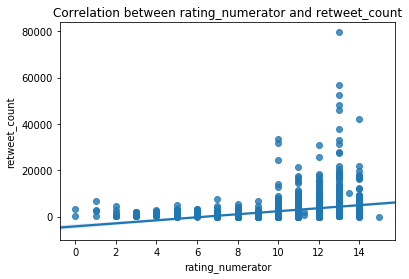

In [92]:
sns.regplot(x=tweet_data1["rating_numerator"], y=tweet_data1["retweet_count"])
plt.title('Correlation between rating_numerator and retweet_count')

In [93]:
tweet_data1['rating_numerator'].corr(tweet_data1['retweet_count'])

0.30492555901695351

Although rating_numerator and retweet_count are relative, the correlation between both is week (0.3)- meaning that if rating_numerator increases, retweet_count could also increase 

Text(0.5,1,'Correlation between rating_numerator and favorite_count')

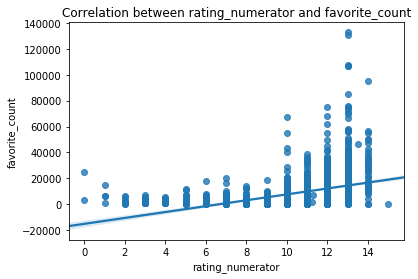

In [94]:
sns.regplot(x=tweet_data1["rating_numerator"], y=tweet_data1["favorite_count"])
plt.title('Correlation between rating_numerator and favorite_count')

In [95]:
tweet_data1['rating_numerator'].corr(tweet_data1['favorite_count'])

0.40723184172529825